In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_distances
import numpy
from sklearn.metrics import f1_score,precision_score,recall_score
import os

In [22]:
import json

dev_path = "E:/Professional Masters in Data Science/SEM 3/NLP/Project/Task-2-SemEval-2024-main/Task-2-SemEval-2024-main/training_data/dev.json"
with open(dev_path) as json_file:
    dev = json.load(json_file)

# Example instance
print(dev[list(dev.keys())[1]])
print(dev[list(dev.keys())[3]])

{'Type': 'Comparison', 'Section_id': 'Eligibility', 'Primary_id': 'NCT00425854', 'Secondary_id': 'NCT01224678', 'Statement': 'Patients with significantly elevated ejection fraction are excluded from the primary trial, but can still be eligible for the secondary trial if they are 55 years of age or over', 'Label': 'Contradiction'}
{'Type': 'Single', 'Section_id': 'Results', 'Primary_id': 'NCT00593346', 'Statement': 'the primary trial does not report the PFS or objective response rate of its patient cohort', 'Label': 'Entailment'}


In [20]:
uuid_list = list(dev.keys())
statements = []
gold_dev_primary_evidence = []
gold_dev_secondary_evidence = []
for i in range(len(uuid_list)):
  #Retrieve all statements from the development set
  statements.append(dev[uuid_list[i]]["Statement"])

In [25]:
path="E:/Professional Masters in Data Science/SEM 3/NLP/Project/Task-2-SemEval-2024-main/Task-2-SemEval-2024-main/training_data/CT json"
for i in range(len(uuid_list)):
  primary_ctr_path = os.path.join(path,dev[uuid_list[i]]["Primary_id"]+".json")
  with open(primary_ctr_path) as json_file:
    primary_ctr = json.load(json_file)

  #Retrieve the full section from the primary trial
  print(primary_ctr[dev[uuid_list[i]]["Section_id"]])

['Outcome Measurement: ', '  Event-free Survival', '  Event free survival, the primary endpoint of this study, is defined as the time from randomization to the time of documented locoregional or distant recurrence, new primary breast cancer, or death from any cause.', '  Time frame: 5 years', 'Results 1: ', '  Arm/Group Title: Exemestane', '  Arm/Group Description: Patients receive oral exemestane (25 mg) once daily for 5 years.', '  exemestane: Given orally', '  Overall Number of Participants Analyzed: 3789', '  Measure Type: Number', '  Unit of Measure: percentage of participants  88        (87 to 89)', 'Results 2: ', '  Arm/Group Title: Anastrozole', '  Arm/Group Description: Patients receive oral anastrozole (1 mg) once daily for 5 years.', '  anastrozole: Given orally', '  Overall Number of Participants Analyzed: 3787', '  Measure Type: Number', '  Unit of Measure: percentage of participants  89        (88 to 90)']
['Inclusion criteria:', 'Inclusion Criteria:', '  Female patients 

In [26]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

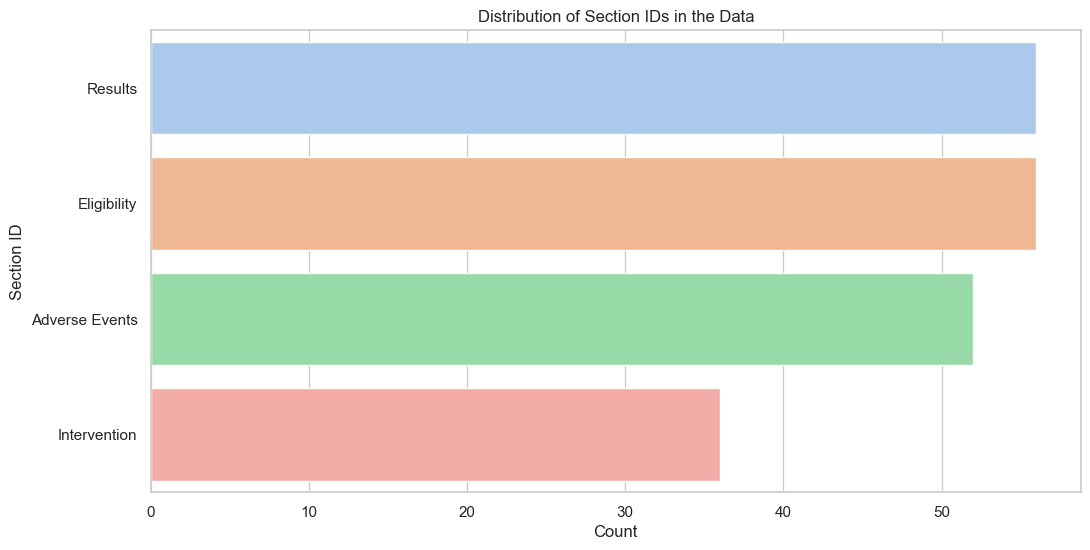

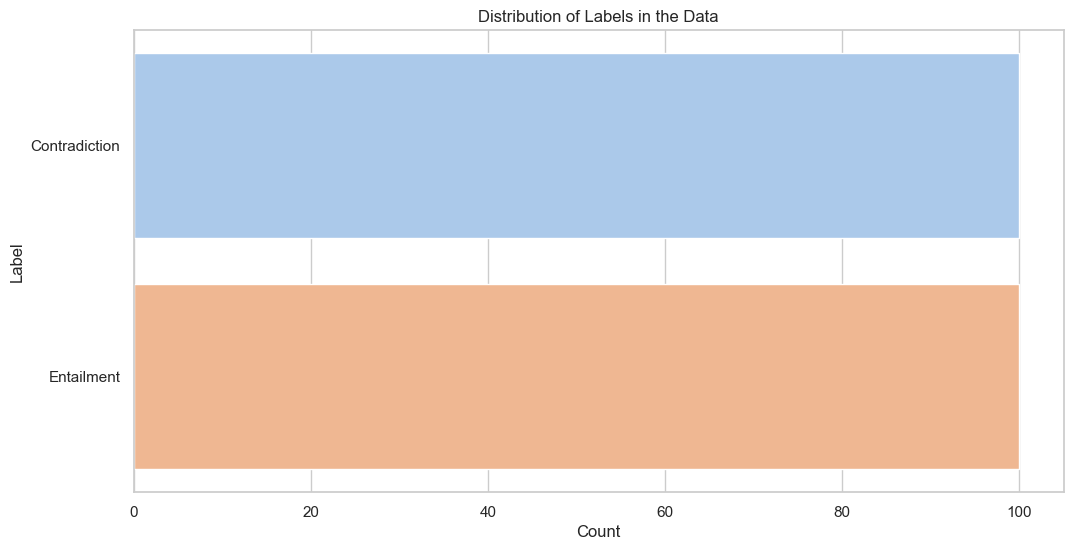

In [27]:

dev_path = "E:/Professional Masters in Data Science/SEM 3/NLP/Project/Task-2-SemEval-2024-main/Task-2-SemEval-2024-main/training_data/dev.json"
with open(dev_path) as json_file:
    data = json.load(json_file)

# Convert to DataFrame
df = pd.DataFrame.from_dict(data, orient='index')
df.reset_index(inplace=True)
df.rename(columns={'index': 'Record ID'}, inplace=True)

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Plotting the distribution of Section IDs
plt.figure(figsize=(12, 6))
sns.countplot(y='Section_id', data=df, palette='pastel')
plt.title('Distribution of Section IDs in the Data')
plt.xlabel('Count')
plt.ylabel('Section ID')
plt.show()

# Plotting the distribution of Labels
plt.figure(figsize=(12, 6))
sns.countplot(y='Label', data=df, palette='pastel')
plt.title('Distribution of Labels in the Data')
plt.xlabel('Count')
plt.ylabel('Label')
plt.show()

In [28]:
df

,Record ID,Type,Section_id,Primary_id,Statement,Label,Secondary_id
0,1adc970c-d433-44d0-aa09-d3834986f7a2,Single,Results,NCT00066573,there is a 13.2% difference between the result...,Contradiction,NaN
1,6b9162d0-0816-46d4-81af-c60028dcc63b,Comparison,Eligibility,NCT00425854,Patients with significantly elevated ejection ...,Contradiction,NCT01224678
2,0b6cc8e3-69ee-4a91-b93d-2ad3fddce65f,Comparison,Adverse Events,NCT02273973,a significant number of the participants in th...,Contradiction,NCT00281697
3,cc1f712a-2116-4e40-9810-f315e3fa5ff8,Single,Results,NCT00593346,the primary trial does not report the PFS or o...,Entailment,NaN
4,904061c0-14fa-4f13-9118-9a41e24fa8eb,Single,Eligibility,NCT02340221,Prior treatment with fulvestrant or with a pho...,Contradiction,NaN
...,...,...,...,...,...,...,...
195,d310ec4e-993e-4827-8dc5-9aca053972db,Comparison,Intervention,NCT00688909,The the primary trial intervention involves on...,Contradiction,NCT00450723
196,a5617ae4-05a3-42d0-9e14-141de5f8c010,Comparison,Adverse Events,NCT00258960,the secondary trial reported 1 single case of ...,Entailment,NCT00121992
197,42d1fcd3-8faa-4065-bbba-42cc90ab67fb,Comparison,Results,NCT00856492,the secondary trial and the primary trial do n...,Entailment,NCT00009945
198,d01fda83-5dc8-4ad5-92b8-7553dabd7046,Single,Results,NCT00428922,the outcome measurement of the primary trial i...,Entailment,NaN


In [29]:
df[df['Type']=='Single']

,Record ID,Type,Section_id,Primary_id,Statement,Label,Secondary_id
0,1adc970c-d433-44d0-aa09-d3834986f7a2,Single,Results,NCT00066573,there is a 13.2% difference between the result...,Contradiction,NaN
3,cc1f712a-2116-4e40-9810-f315e3fa5ff8,Single,Results,NCT00593346,the primary trial does not report the PFS or o...,Entailment,NaN
4,904061c0-14fa-4f13-9118-9a41e24fa8eb,Single,Eligibility,NCT02340221,Prior treatment with fulvestrant or with a pho...,Contradiction,NaN
5,43ee7645-ce1e-42d5-9a74-3e379f6f367b,Single,Eligibility,NCT00281697,only patients with a HER2-positive status can ...,Contradiction,NaN
6,0cef8c8e-7986-46c7-a597-c5733a9899c0,Single,Results,NCT00915603,the shortest PFS in cohort 1 of the primary tr...,Contradiction,NaN
...,...,...,...,...,...,...,...
190,016943fa-57ea-4293-8131-03292ea1836c,Single,Eligibility,NCT00550771,A patient with a node positive T2 N2 M0 adenoc...,Contradiction,NaN
192,62be4676-099f-4c42-8029-773af8fde6f7,Single,Eligibility,NCT00572728,Patients must be bedbound or severaly disabled...,Contradiction,NaN
194,566bdc2d-7c4a-4547-87da-ac81447ecca8,Single,Results,NCT00820222,the primary trial results show that the Trastu...,Contradiction,NaN
198,d01fda83-5dc8-4ad5-92b8-7553dabd7046,Single,Results,NCT00428922,the outcome measurement of the primary trial i...,Entailment,NaN


In [30]:
from transformers import AutoModel, AutoTokenizer

model_name = "microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract-fulltext"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

C:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\huggingface_hub\file_download.py:147: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\LEGION\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


config.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/226k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [54]:
import os
import json
import numpy as np
from transformers import AutoTokenizer, AutoModel
from scipy.spatial.distance import cosine

# Initialize the PubMedBERT tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract-fulltext")
model = AutoModel.from_pretrained("microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract-fulltext")

def get_embedding(text):
    """Generate embeddings for a given text using PubMedBERT."""
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512)
    outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).detach().numpy()

def average_cosine_similarity(embeddings1, embeddings2):
    """Calculate the average cosine similarity between two sets of embeddings."""
    similarities = [cosine(embeddings1[i], embeddings2[j]) for i in range(len(embeddings1)) for j in range(len(embeddings2))]
    return np.average(similarities)

Results = {}
path = "E:/Professional Masters in Data Science/SEM 3/NLP/Project/Task-2-SemEval-2024-main/Task-2-SemEval-2024-main/training_data/CT json"

for i in range(len(uuid_list)):
    primary_ctr_path = os.path.join(path, dev[uuid_list[i]]["Primary_id"] + ".json")
    with open(primary_ctr_path) as json_file:
        primary_ctr = json.load(json_file)

    # Retrieve the full section from the primary trial
    primary_section = primary_ctr[dev[uuid_list[i]]["Section_id"]]
    primary_section_embedding = get_embedding(primary_section)
    statement_embedding = get_embedding(statements[i])

    # Compute the cosine similarity between the primary section and the statement
    primary_score = average_cosine_similarity(primary_section_embedding, statement_embedding)

    if dev[uuid_list[i]]["Type"] == "Comparison":
        secondary_ctr_path = os.path.join(path, dev[uuid_list[i]]["Secondary_id"] + ".json")
        with open(secondary_ctr_path) as json_file:
            secondary_ctr = json.load(json_file)
        secondary_section = secondary_ctr[dev[uuid_list[i]]["Section_id"]]
        secondary_section_embedding = get_embedding(secondary_section)

        # Compute the cosine similarity for the secondary trial
        secondary_score = average_cosine_similarity(secondary_section_embedding, statement_embedding)

        # Combine and average the cosine similarities
        combined_score = np.average([primary_score, secondary_score])

        Prediction = "Entailment" if combined_score <= 0.12 else "Contradiction"
        Results[str(uuid_list[i])] = {"Prediction": Prediction}
    else:
        Prediction = "Entailment" if primary_score <= 0.12 else "Contradiction"
        Results[str(uuid_list[i])] = {"Prediction": Prediction}

        

In [56]:
def main():

    gold = dev
    results = Results
    uuid_list = list(results.keys())

    results_pred = []
    gold_labels = []
    for i in range(len(uuid_list)):
        if results[uuid_list[i]]["Prediction"] == "Entailment":
            results_pred.append(1)
        else:
            results_pred.append(0)
        if gold[uuid_list[i]]["Label"] == "Entailment":
            gold_labels.append(1)
        else:
            gold_labels.append(0)

    f_score = f1_score(gold_labels,results_pred)
    p_score = precision_score(gold_labels,results_pred)
    r_score = recall_score(gold_labels,results_pred)

    print('F1:{:f}'.format(f_score))
    print('precision_score:{:f}'.format(p_score))
    print('recall_score:{:f}'.format(r_score))

if '__main__' == __name__:
    main()

F1:0.639405
precision_score:0.508876
recall_score:0.860000
